# First Spectral Analyses
In this notebook, we introduce spectral analysis, which forms the foundation of the signal processing methods used by wave buoy teams before publishing wave parameters on their [website](https://cdip.ucsd.edu). In essence, these analyses describe the distribution of wave energy (proportional to the square of the amplitude) as a function of frequencies.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

Generate a sinusoidal and monochromatic wave 

In [2]:
dt = .5 # the time sampling
amplitude = 1 # wave amplitude
T = 16.6 # The period of the wave
duration_exp1 = 180 # the duration for the first experiement
duration_exp2 = 1000 # the duration for the second experiement
time_exp1 = np.arange(0, duration_exp1, dt) # time axis exp 1
time_exp2 = np.arange(0, duration_exp2, dt) # time axis exp 2

omega = 2*np.pi*(1/T)
phase_0 = 0
monochromatic_wave = amplitude * np.sin(omega*time_exp1 + phase_0)

Text(0, 0.5, 'Ampltiude [m]')

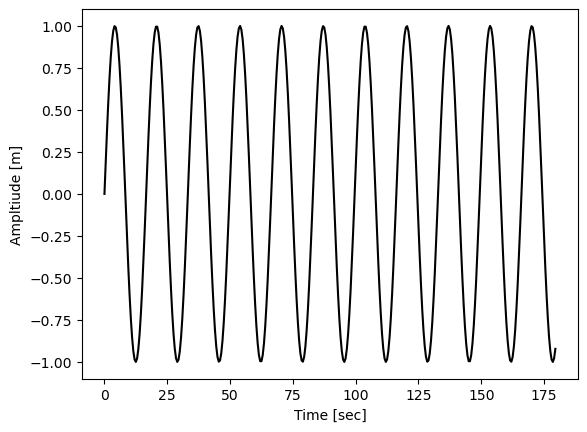

In [3]:
fig, ax = plt.subplots()
ax.plot(time_exp1, monochromatic_wave, color = 'k')
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Ampltiude [m]')


### Spectral Analysis
This is where Fourier Transform is involved. Below the Fourier Transform of the wave above

$$
FT(a)(f) = \frac{1}{\sqrt{2}}\int_{R^{+}} dt Asin(\omega t) e^{-ift}
$$

If we write the sinus function in its Euler form:
$sin(t) = \frac{e^{it}-e{-it}}{2i}$ we can compute the tranform analyticaly and we get a dirac centered on 1/$\omega$. Numerically we use the Fast Fourier Transform from the numpy package.

In [4]:
n = len(time_exp1)
freqs = np.fft.fftfreq(n, dt) # create a frequency axis // fmin = 1/(duration_exp1), fmax = 2 *dt
FT = np.fft.fft(monochromatic_wave)



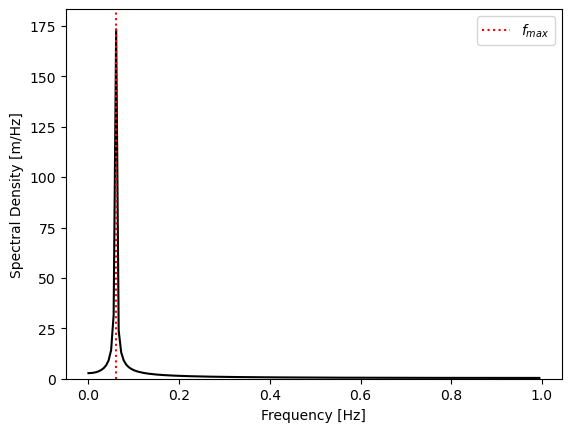

In [5]:
fig, ax  = plt.subplots()
ax.plot(freqs[:n//2], np.abs(FT)[:n//2], color = 'k')
ax.plot([1/T, 1/T], [0, np.amax(np.abs(FT)[:n//2]+10)], color = 'r', linestyle = ':', label = '$f_{max}$')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Spectral Density [m/Hz]')
ax.set_ylim([0, np.amax(np.abs(FT)[:n//2]+10)])
ax.legend()

The Dirac delta is not perfectly represented due to the discrete frequency axis used in the numerical Fourier transform.

Now let's reproduce the same spectral analysis but for two superposed waves with close and distinct separated frequencies.

In [6]:
def carrier_wave_one_env(a,T_port,delta_omega,n):
    """
    Purpose:
    --------
    create a synthetic SSH 1D field with one env and one carrier wave,
    The wavelength (L and L_env) are in meter,
    Inputs:
    --------
    Outputs:
    --------
    """
    t = np.arange(0, n, 1) # along-track coordinate\n",
    omega = 1 / T_port

    zeta = a * np.sin(omega * t) + a * np.sin((omega + delta_omega) * t)
    return t, zeta

def two_waves(a, T1_port, T2_port,n):
    """
    Purpose:
    --------
    create a synthetic SSH 1D field with one env and one carrier wave,
    The wavelength (L and L_env) are in meter,
    Inputs:
    --------
    Outputs:
    --------
    """
    t = np.arange(0, n, 1) # along-track coordinate\n",
    omega1 = 1 / T1_port
    omega2 = 1 / T2_port

    zeta = a * np.sin(omega1 * t) + a * np.sin((omega2) * t)
    return t,zeta

In [7]:
T1 = 16.6
T2 = 5.6
n = len(time_exp2)
delta_omega1 = .01
time, wave_1 = carrier_wave_one_env(amplitude, T1, delta_omega1, n)
_, wave_2 = two_waves(amplitude, T1, T2, n)

Text(0.5, 1.0, 'Distinct frequencies')

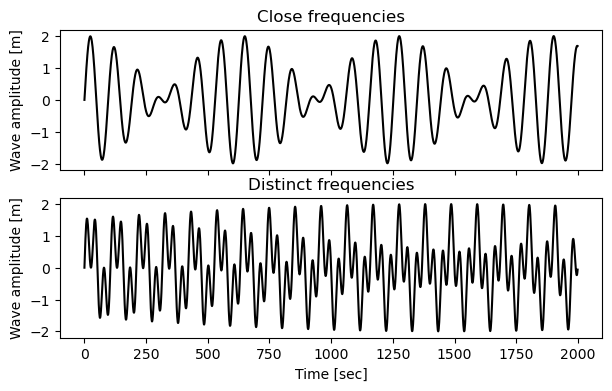

In [8]:
fig, axes = plt.subplots(nrows = 2, figsize = (7, 4), sharex = True)
ax = axes[0]
ax.plot(time, wave_1, color = 'k')
ax.set_ylabel('Wave amplitude [m]')
ax.set_title('Close frequencies')
ax = axes[1]
ax.plot(time, wave_2, color = 'k')
ax.set_ylabel('Wave amplitude [m]')
ax.set_xlabel('Time [sec]')
ax.set_title('Distinct frequencies')


In [9]:
n = len(time_exp2)
freqs = np.fft.fftfreq(n, dt) # create a frequency axis // fmin = 1/(duration_exp1), fmax = 2 *dt
FT1 = np.fft.fft(wave_1)
FT2 = np.fft.fft(wave_2)

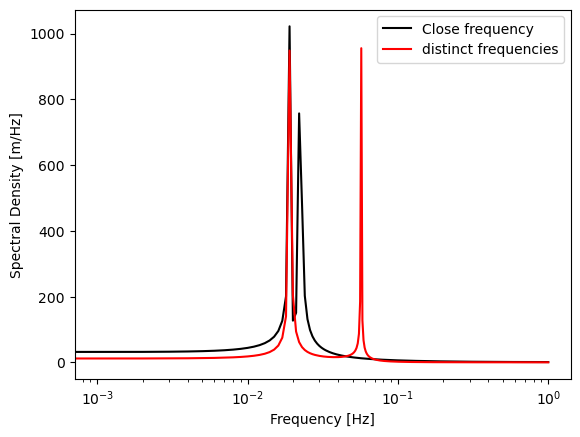

In [10]:
fig, ax  = plt.subplots()
ax.semilogx(freqs[:n//2], np.abs(FT1)[:n//2], color = 'k', label = 'Close frequency')
ax.semilogx(freqs[:n//2], np.abs(FT2)[:n//2], color = 'r', label = 'distinct frequencies')

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Spectral Density [m/Hz]')
ax.legend()

You can see that the separation between the peaks increases as the difference between $\omega_1$ and $\omega_2$ grows. In realistic ocean wave fields, we may observe very narrow **wave frequency spectra** (this is the term we will use hereafter to refer to such plots), but such distinct peaks are not physically realistic. The apparent spectral density gap between the two peaks in the black spectrum does not occur in nature. Even when wave frequencies are very close, the spectrum remains continuous. It is also important to remember that the shape of the spectrum depends on the frequency axis resolution, which in turn is controlled by the sampling frequency.